In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Feed-Forward Neural Network on UTKFace Dataset

## Overview
This project implements a simple feed-forward neural network using TensorFlow. The goal is to predict the race of individuals in the UTKFace dataset, which contains images of faces labeled with attributes such as age, gender, and race. This project marks my first interaction with TensorFlow, focusing on building and training a basic neural network for classification tasks.

## Dataset
The UTKFace dataset includes images of faces with various attributes, and the target label for this project is the race attribute. The images are preprocessed and fed into the neural network for race prediction.

## Course
- **Course Title**: Artificial Intelligence


In [21]:
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .

In [22]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [23]:
import os
from tensorflow.keras import *
from tensorflow.keras.utils import *
import numpy as np
import pandas as pd
import tensorboard
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from collections import Counter
import matplotlib.image as mpimg

### **Phase 1: Data Exploration and Preprocessing**


### The number of classes and the total number of data points have been printed.


In [24]:
img_path = list()
races = list()

path = "/content/UTKFace"
for img in os.listdir(path):
  temp = img.split('.')

  if len(temp[0].split('_')) == 4:
    img_path.append(os.path.join(path, img))
    Age, Gender, Race, Date = temp[0].split('_')
    races.append(int(Race))
  else:
    continue
print("number of datas  = ", len(races))
r = races
print("classes = ",*Counter(races))
classes_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"others"}
races = [str(to_categorical(i, len(classes_labels))) for i in races]
#r = [str(to_string(i, len(classes_labels))) for i in races]


df = pd.DataFrame({
    'image': img_path,
    'Race': races
})

number of datas  =  23705
classes =  1 3 0 2 4


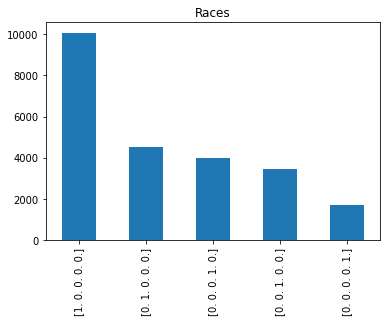

In [25]:
test = df['Race'].value_counts(dropna=False)
test.plot.bar()
plt.title('Races')
plt.show()

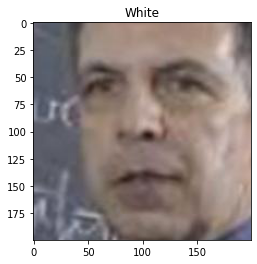

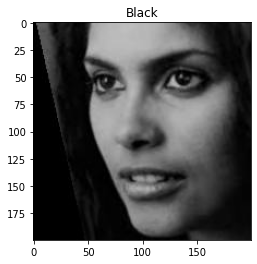

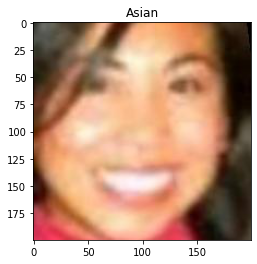

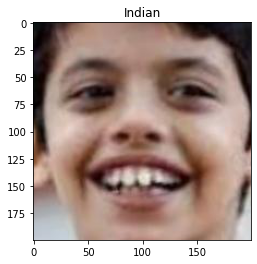

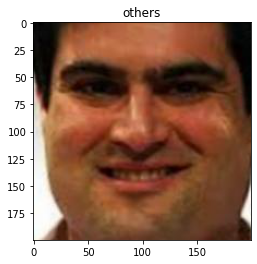

In [55]:
indexes = list()
for i in range(5):
  ind = r.index(i)
  indexes.append(ind)

for i in indexes:
  plt.figure()
  pic = mpimg.imread(img_path[i])
  RACE = r[i]
  plt.title(classes_labels[RACE])
  imgplot = plt.imshow(pic)


### The dataset has been split into train and test sets with a 70 to 30 ratio.


In [27]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.3
)

In [41]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'Race',
    target_size = (100,100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    subset = "training",
    shuffle = False
)

Found 16594 validated image filenames belonging to 5 classes.


In [42]:
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = 'image',
    y_col = 'Race',
    target_size = (100,100),
    color_mode = "grayscale",
    batch_size = 32,
    class_mode = 'categorical',
    subset = "validation",
    shuffle = False
)

Found 7111 validated image filenames belonging to 5 classes.


### **Phase 2: Neural Network Design**


In [37]:
input = layers.Input(shape=(100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024 , activation="relu")(output)
output = layers.Dense(512 , activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

In [61]:
model = models.Model(inputs = input, outputs = output)

In [62]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [63]:
history = model.fit(TrainData, validation_data=TestData, epochs=10)


Epoch 1/10
519/519 [==============================] - 46s 88ms/step - loss: 1.2804 - accuracy: 0.5007 - val_loss: 1.1216 - val_accuracy: 0.5854
Epoch 2/10
519/519 [==============================] - 46s 88ms/step - loss: 1.1022 - accuracy: 0.5880 - val_loss: 1.0121 - val_accuracy: 0.6196
Epoch 3/10
519/519 [==============================] - 45s 88ms/step - loss: 1.0302 - accuracy: 0.6234 - val_loss: 0.9873 - val_accuracy: 0.6420
Epoch 4/10
519/519 [==============================] - 45s 87ms/step - loss: 0.9770 - accuracy: 0.6420 - val_loss: 0.9574 - val_accuracy: 0.6556
Epoch 5/10
519/519 [==============================] - 45s 87ms/step - loss: 0.9356 - accuracy: 0.6593 - val_loss: 0.9221 - val_accuracy: 0.6638
Epoch 6/10
519/519 [==============================] - 45s 87ms/step - loss: 0.9020 - accuracy: 0.6776 - val_loss: 0.9874 - val_accuracy: 0.6307
Epoch 7/10
519/519 [==============================] - 45s 87ms/step - loss: 0.8790 - accuracy: 0.6842 - val_loss: 0.9349 - val_accuracy:

In [64]:
predicted = model.predict(TestData)

In [88]:
predicted = model.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       553
           1       0.55      0.65      0.59      1165
           2       0.86      0.44      0.58      1064
           3       0.86      0.65      0.74      1334
           4       0.64      0.90      0.75      2995

    accuracy                           0.67      7111
   macro avg       0.68      0.53      0.53      7111
weighted avg       0.69      0.67      0.64      7111



In [70]:
True_val = TestData.classes


In [71]:
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.59      0.03      0.06       553
           1       0.62      0.58      0.60      1165
           2       0.74      0.63      0.68      1064
           3       0.80      0.76      0.78      1334
           4       0.69      0.87      0.77      2995

    accuracy                           0.70      7111
   macro avg       0.69      0.58      0.58      7111
weighted avg       0.70      0.70      0.68      7111



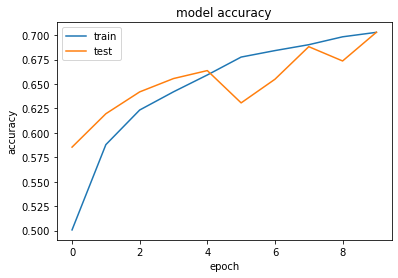

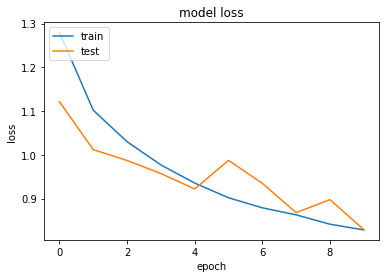

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### The parameters of each layer in the network are shown. This is the number of weights stored for each layer, calculated as (number of neurons in the first layer + 1) * (number of neurons in the second layer).  
### The +1 accounts for the biases.


In [73]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


# **Phase 3: Data Classification**


## **Part 1: Effect of Optimizer:**  
### Momentum = 0.5


### What is momentum and why is it useful?  
Momentum is an extension to the gradient descent algorithm, used to speed up the optimization process. In gradient descent, a potential issue is that while the gradient moves toward the minimum, in certain situations, it may cause jumps in the search space due to the nature of the gradient at that point. Using momentum can reduce the speed of these operations and prevent such jumps.

Momentum is particularly useful in scenarios where the objective function has high curvature, and the gradient may experience significant changes in small search spaces. Additionally, momentum helps in flat or near-flat regions (zero slope), allowing the search process to move smoothly through such areas.


In [74]:
model1 = models.Model(inputs = input, outputs = output)

In [75]:
model1.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum = 0.5), loss="categorical_crossentropy", metrics=["accuracy"])

In [76]:
history1 = model1.fit(TrainData, validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 48s 92ms/step - loss: 0.8690 - accuracy: 0.6865 - val_loss: 1.0130 - val_accuracy: 0.6345
Epoch 2/10
519/519 [==============================] - 48s 93ms/step - loss: 0.8375 - accuracy: 0.6955 - val_loss: 0.9037 - val_accuracy: 0.6722
Epoch 3/10
519/519 [==============================] - 48s 92ms/step - loss: 0.8138 - accuracy: 0.7107 - val_loss: 0.8489 - val_accuracy: 0.7067
Epoch 4/10
519/519 [==============================] - 48s 92ms/step - loss: 0.7980 - accuracy: 0.7163 - val_loss: 1.0081 - val_accuracy: 0.6345
Epoch 5/10
519/519 [==============================] - 48s 92ms/step - loss: 0.7791 - accuracy: 0.7203 - val_loss: 0.8474 - val_accuracy: 0.6951
Epoch 6/10
519/519 [==============================] - 48s 92ms/step - loss: 0.7620 - accuracy: 0.7298 - val_loss: 0.9210 - val_accuracy: 0.6707
Epoch 7/10
519/519 [==============================] - 48s 92ms/step - loss: 0.7548 - accuracy: 0.7306 - val_loss: 0.8222 - val_accuracy:

In [77]:
model1.evaluate(TestData)

223/223 [==============================] - 11s 47ms/step - loss: 0.8530 - accuracy: 0.7044


[0.8529536724090576, 0.7044016122817993]

In [79]:
predicted = model1.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.46      0.07      0.12       553
           1       0.66      0.54      0.59      1165
           2       0.74      0.73      0.74      1064
           3       0.61      0.89      0.73      1334
           4       0.77      0.79      0.78      2995

    accuracy                           0.70      7111
   macro avg       0.65      0.61      0.59      7111
weighted avg       0.69      0.70      0.68      7111



<div dir="rtl">
    <font size="3"><b>momentum = 0.9</font>
</div>

In [82]:
model2 = models.Model(inputs = input, outputs = output)

In [83]:
model2.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum = 0.9), loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
history2 = model2.fit(TrainData, validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 49s 93ms/step - loss: 1.0695 - accuracy: 0.6069 - val_loss: 1.0747 - val_accuracy: 0.6449
Epoch 2/10
519/519 [==============================] - 48s 93ms/step - loss: 1.0674 - accuracy: 0.6097 - val_loss: 1.0146 - val_accuracy: 0.6278
Epoch 3/10
519/519 [==============================] - 48s 93ms/step - loss: 1.0283 - accuracy: 0.6259 - val_loss: 1.0800 - val_accuracy: 0.6086
Epoch 4/10
519/519 [==============================] - 48s 93ms/step - loss: 0.9677 - accuracy: 0.6554 - val_loss: 1.0351 - val_accuracy: 0.6005
Epoch 5/10
519/519 [==============================] - 48s 92ms/step - loss: 0.9682 - accuracy: 0.6488 - val_loss: 0.9475 - val_accuracy: 0.6550
Epoch 6/10
519/519 [==============================] - 48s 93ms/step - loss: 0.9215 - accuracy: 0.6708 - val_loss: 0.9191 - val_accuracy: 0.6699
Epoch 7/10
519/519 [==============================] - 48s 92ms/step - loss: 0.9042 - accuracy: 0.6766 - val_loss: 0.9562 - val_accuracy:

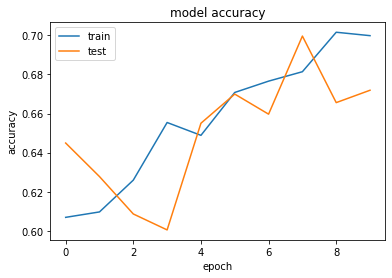

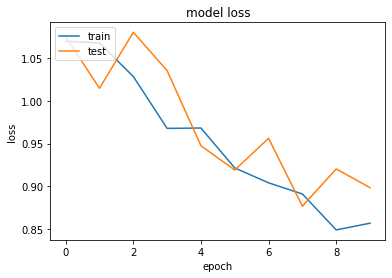

In [85]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
predicted = model2.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       553
           1       0.55      0.65      0.59      1165
           2       0.86      0.44      0.58      1064
           3       0.86      0.65      0.74      1334
           4       0.64      0.90      0.75      2995

    accuracy                           0.67      7111
   macro avg       0.68      0.53      0.53      7111
weighted avg       0.69      0.67      0.64      7111



<div dir="rtl">
    <font size="3"><b>optimizer = adam</font>
</div>

In [31]:
model3 = models.Model(inputs = input, outputs = output)

In [41]:
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [93]:
history3 = model.fit(TrainData, validation_data=TestData, epochs=10)

Epoch 1/10
519/519 [==============================] - 45s 87ms/step - loss: 0.6795 - accuracy: 0.7582 - val_loss: 0.7988 - val_accuracy: 0.7183
Epoch 2/10
519/519 [==============================] - 45s 87ms/step - loss: 0.6658 - accuracy: 0.7622 - val_loss: 0.8049 - val_accuracy: 0.7142
Epoch 3/10
519/519 [==============================] - 45s 88ms/step - loss: 0.6632 - accuracy: 0.7641 - val_loss: 0.8065 - val_accuracy: 0.7166
Epoch 4/10
519/519 [==============================] - 45s 87ms/step - loss: 0.6610 - accuracy: 0.7655 - val_loss: 0.8109 - val_accuracy: 0.7140
Epoch 5/10
519/519 [==============================] - 46s 88ms/step - loss: 0.6571 - accuracy: 0.7674 - val_loss: 0.8053 - val_accuracy: 0.7168
Epoch 6/10
519/519 [==============================] - 46s 88ms/step - loss: 0.6561 - accuracy: 0.7694 - val_loss: 0.8149 - val_accuracy: 0.7145
Epoch 7/10
519/519 [==============================] - 46s 89ms/step - loss: 0.6537 - accuracy: 0.7674 - val_loss: 0.8104 - val_accuracy:

In [94]:
predicted = model3.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.33      0.05      0.09       553
           1       0.59      0.65      0.62      1165
           2       0.79      0.66      0.72      1064
           3       0.81      0.75      0.78      1334
           4       0.72      0.87      0.79      2995

    accuracy                           0.72      7111
   macro avg       0.65      0.60      0.60      7111
weighted avg       0.70      0.72      0.70      7111



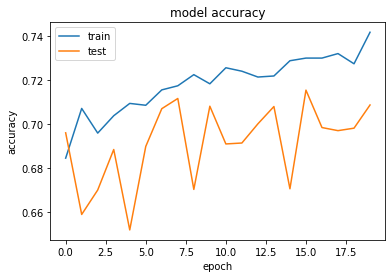

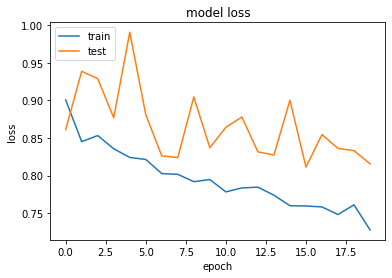

In [120]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Comparison of Adam and SGD  
As observed, using this optimizer not only improves the accuracy in the final epochs compared to other methods, but the classification report data also shows that the f1_score related to accuracy is better with this method, reaching 72.


### **Part 2: Effect of Epoch**


In each epoch, the entire training data is reviewed once. As a result, if multiple epochs are used in a neural network, each data point is reviewed and used several times. This generally improves the performance of the neural network, as after each epoch, the weights are updated to better values. Since we typically use limited data and employ gradient descent, which is an iterative method for updating the weights, using multiple epochs can be beneficial.

Is using more epochs always beneficial? No, if the number of epochs is too low, it can lead to underfitting. If the number is appropriate, the model will reach an optimal state. However, too many epochs can result in overfitting. The ideal number of epochs depends on the dataset and is directly related to the diversity of the data. The appropriate number should be determined by analyzing the loss graphs to avoid underfitting and overfitting.


<div dir="rtl">
    <font size="3"><b>epoch = 20</font>
</div>

In [43]:
model4 = models.Model(inputs = input, outputs = output)

In [44]:
model4.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [45]:
history4 = model4.fit(TrainData, validation_data=TestData, epochs=20)

Epoch 1/20
519/519 [==============================] - 64s 122ms/step - loss: 1.4484 - accuracy: 0.5203 - val_loss: 1.0832 - val_accuracy: 0.5939
Epoch 2/20
519/519 [==============================] - 64s 123ms/step - loss: 1.0364 - accuracy: 0.6208 - val_loss: 0.9964 - val_accuracy: 0.6496
Epoch 3/20
519/519 [==============================] - 63s 121ms/step - loss: 0.9625 - accuracy: 0.6517 - val_loss: 0.9890 - val_accuracy: 0.6439
Epoch 4/20
519/519 [==============================] - 63s 121ms/step - loss: 0.9269 - accuracy: 0.6690 - val_loss: 0.9977 - val_accuracy: 0.6517
Epoch 5/20
519/519 [==============================] - 63s 121ms/step - loss: 0.8997 - accuracy: 0.6784 - val_loss: 0.9002 - val_accuracy: 0.6847
Epoch 6/20
519/519 [==============================] - 63s 121ms/step - loss: 0.8846 - accuracy: 0.6843 - val_loss: 0.8705 - val_accuracy: 0.6906
Epoch 7/20
519/519 [==============================] - 63s 122ms/step - loss: 0.8703 - accuracy: 0.6909 - val_loss: 0.9338 - val_ac

In [47]:
predicted = model4.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.31      0.02      0.04       525
           1       0.59      0.66      0.62      1209
           2       0.66      0.74      0.70      1023
           3       0.86      0.64      0.73      1370
           4       0.70      0.83      0.76      2984

    accuracy                           0.69      7111
   macro avg       0.62      0.58      0.57      7111
weighted avg       0.68      0.69      0.67      7111



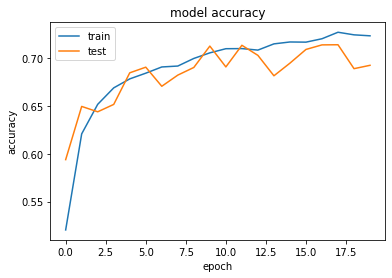

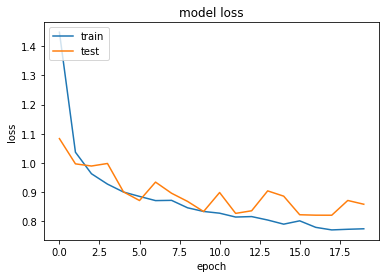

In [48]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Part 3: Effect of Loss Function**  
### Loss Function = MSE


In this section, the performance of the network clearly decreases because the MSE loss function is not suitable for classification tasks.

Why is MSE not suitable for classification?  

The first reason is that when we use MSE, it assumes that the data follows a normal distribution, whereas classification data typically follows a Bernoulli distribution.  
Additionally, the MSE function expects inputs to range from negative infinity to infinity, but the outputs of classification models are binary. As a result, using MSE cannot guarantee that the loss will be minimized.


In [96]:
model5 = models.Model(inputs = input, outputs = output)

In [97]:
model5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["accuracy"])

In [98]:
history5 = model5.fit(TrainData, validation_data=TestData, epochs=20)

Epoch 1/20
519/519 [==============================] - 53s 102ms/step - loss: 0.0747 - accuracy: 0.7362 - val_loss: 0.0847 - val_accuracy: 0.7022
Epoch 2/20
519/519 [==============================] - 52s 101ms/step - loss: 0.0741 - accuracy: 0.7376 - val_loss: 0.0923 - val_accuracy: 0.6659
Epoch 3/20
519/519 [==============================] - 53s 102ms/step - loss: 0.0733 - accuracy: 0.7405 - val_loss: 0.0880 - val_accuracy: 0.6868
Epoch 4/20
519/519 [==============================] - 53s 102ms/step - loss: 0.0743 - accuracy: 0.7383 - val_loss: 0.0821 - val_accuracy: 0.7090
Epoch 5/20
519/519 [==============================] - 53s 102ms/step - loss: 0.0751 - accuracy: 0.7350 - val_loss: 0.0853 - val_accuracy: 0.6995
Epoch 6/20
519/519 [==============================] - 53s 101ms/step - loss: 0.0738 - accuracy: 0.7408 - val_loss: 0.0834 - val_accuracy: 0.7043
Epoch 7/20
519/519 [==============================] - 52s 101ms/step - loss: 0.0716 - accuracy: 0.7503 - val_loss: 0.0819 - val_ac

In [99]:
predicted = model5.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.25      0.06      0.10       553
           1       0.72      0.39      0.50      1165
           2       0.78      0.59      0.67      1064
           3       0.79      0.77      0.78      1334
           4       0.65      0.92      0.76      2995

    accuracy                           0.69      7111
   macro avg       0.64      0.54      0.56      7111
weighted avg       0.67      0.69      0.66      7111



### **Part 4: Effect of Regularization**  
### Regularizer: L2


One of the most important aspects of machine learning is preventing overfitting. Regularization is a method that aims to significantly reduce variance in the model without causing a substantial increase in bias, bringing the model closer to a balanced state. However, beyond a certain value, the model starts losing important features, leading to increased bias and underfitting. But if applied correctly, regularization can improve accuracy.


In [107]:
from keras.regularizers import l2
input = layers.Input(shape=(100, 100, 1))

reg_output = layers.Flatten()(input)
reg_output = layers.Dense(1024 , activation="relu", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activity_regularizer=l2(0.0001))(reg_output)
reg_output = layers.Dense(512 , activation="relu", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activity_regularizer=l2(0.0001))(reg_output)
reg_output = layers.Dense(5 , activation="softmax", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001), activity_regularizer=l2(0.0001))(reg_output)



In [108]:
model6 = models.Model(inputs = input, outputs = reg_output)
model6.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [109]:
history6 = model6.fit(TrainData, validation_data=TestData, epochs=20, batch_size=32)

Epoch 1/20
519/519 [==============================] - 75s 144ms/step - loss: 1.6872 - accuracy: 0.4921 - val_loss: 1.3217 - val_accuracy: 0.5518
Epoch 2/20
519/519 [==============================] - 74s 142ms/step - loss: 1.1788 - accuracy: 0.6075 - val_loss: 1.0800 - val_accuracy: 0.6348
Epoch 3/20
519/519 [==============================] - 74s 142ms/step - loss: 1.0694 - accuracy: 0.6488 - val_loss: 0.9994 - val_accuracy: 0.6681
Epoch 4/20
519/519 [==============================] - 73s 141ms/step - loss: 1.0259 - accuracy: 0.6519 - val_loss: 0.9886 - val_accuracy: 0.6698
Epoch 5/20
519/519 [==============================] - 73s 141ms/step - loss: 0.9892 - accuracy: 0.6687 - val_loss: 1.1046 - val_accuracy: 0.6131
Epoch 6/20
519/519 [==============================] - 73s 141ms/step - loss: 0.9686 - accuracy: 0.6743 - val_loss: 1.1096 - val_accuracy: 0.6020
Epoch 7/20
519/519 [==============================] - 74s 142ms/step - loss: 0.9723 - accuracy: 0.6710 - val_loss: 0.9620 - val_ac

In [110]:
predicted = model6.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.50      0.68      0.58      1165
           2       0.57      0.84      0.68      1064
           3       0.74      0.79      0.76      1334
           4       0.80      0.68      0.74      2995

    accuracy                           0.67      7111
   macro avg       0.52      0.60      0.55      7111
weighted avg       0.65      0.67      0.65      7111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


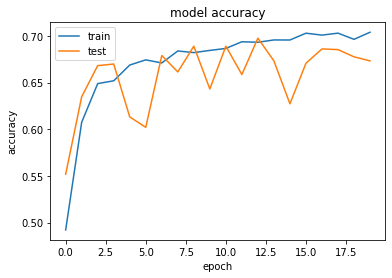

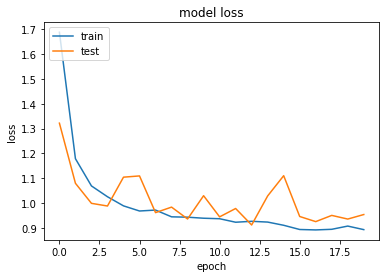

In [117]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Part 5: Dropout**


Dropout is a regularization method where some output neurons in each layer are randomly ignored with a probability of p. The purpose of using this method is to prevent overfitting. In fully connected layers, the neurons become dependent on each other during training, reducing the individual strength of each neuron, which leads to overfitting to the training data.


In [111]:
input = layers.Input(shape=(100, 100, 1))

reg_drop_output = layers.Flatten()(input)
reg_drop_output = layers.Dense(1024 , activation="relu", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(reg_drop_output)
reg_drop_output = layers.Dropout(0.2)(reg_drop_output)
reg_drop_output = layers.Dense(512 , activation="relu", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(reg_drop_output)
reg_drop_output = layers.Dropout(0.2)(reg_drop_output)
reg_drop_output = layers.Dense(5 , activation="softmax", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(reg_drop_output)

In [112]:
model7 = models.Model(inputs = input, outputs = reg_drop_output)
model7.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
history7 = model7.fit(TrainData, validation_data=TestData, epochs=20, batch_size=32)

Epoch 1/20
519/519 [==============================] - 75s 144ms/step - loss: 1.7810 - accuracy: 0.4306 - val_loss: 1.3990 - val_accuracy: 0.5223
Epoch 2/20
519/519 [==============================] - 74s 142ms/step - loss: 1.4027 - accuracy: 0.4837 - val_loss: 1.2692 - val_accuracy: 0.5311
Epoch 3/20
519/519 [==============================] - 74s 142ms/step - loss: 1.3205 - accuracy: 0.5038 - val_loss: 1.2280 - val_accuracy: 0.5562
Epoch 4/20
519/519 [==============================] - 74s 143ms/step - loss: 1.2725 - accuracy: 0.5181 - val_loss: 1.2615 - val_accuracy: 0.5191
Epoch 5/20
519/519 [==============================] - 74s 142ms/step - loss: 1.2390 - accuracy: 0.5253 - val_loss: 1.1466 - val_accuracy: 0.5898
Epoch 6/20
519/519 [==============================] - 74s 143ms/step - loss: 1.2248 - accuracy: 0.5327 - val_loss: 1.1734 - val_accuracy: 0.5864
Epoch 7/20
519/519 [==============================] - 74s 142ms/step - loss: 1.1903 - accuracy: 0.5425 - val_loss: 1.0559 - val_ac

In [113]:
predicted = model7.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
print(classification_report(True_val, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.54      0.58      0.56      1165
           2       0.78      0.53      0.63      1064
           3       0.83      0.70      0.76      1334
           4       0.63      0.85      0.73      2995

    accuracy                           0.66      7111
   macro avg       0.56      0.53      0.54      7111
weighted avg       0.63      0.66      0.64      7111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


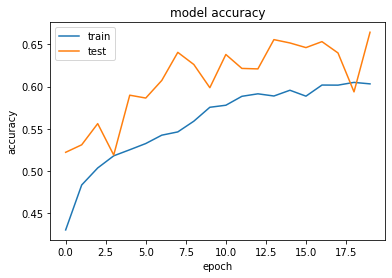

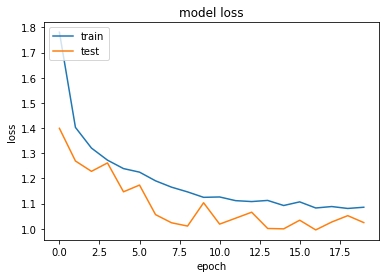

In [114]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Printing Images**


In [49]:
predicted = model4.predict(TestData)
predicted = list(np.argmax(predicted, axis=1))
#print(predicted[1])
True_val = TestData.classes
#print(True_val[1])
correct_predicted = list()
false_predicted = list()
C_counter = 0
F_counter = 0
i = 0
while(C_counter<20 or F_counter<20):
  if predicted[i] == True_val[i]:
    correct_predicted.append(i)
    C_counter += 1
  else:
    false_predicted.append(i)
    F_counter += 1
  i +=1

In [50]:
correct_predicted = correct_predicted[:10]
false_predicted = false_predicted[0:10]
print(correct_predicted, false_predicted)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 12] [2, 10, 11, 14, 15, 21, 22, 23, 30, 34]


In [136]:
test = TestData.next()

In [ ]:
x= TestData.next()
for i in range(0,4):
    image = x[i].reshape(100,100,1)
    plt.imshow(image)
    plt.show()